In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models import VAE
from MIDI import *

In [10]:
latent_dim = 64
datafile = 'data/output/dummy_22_12_64bpb_tracks.npz'
songdict = np.load(datafile, allow_pickle = True)
print([k for k in songdict.keys()])
song1 = songdict['dummy_40_hiphop_110_beat_4-4.mid']
song2 = songdict['dummy_10_soul-groove10_102_beat_4-4.mid']
song = np.concatenate([song1, song2], axis = 0)
print(song.shape, np.max(song))

['notedict', 'dummy_40_hiphop_110_beat_4-4.mid', 'dummy_1_funk_80_beat_4-4.mid', 'dummy_10_soul-groove10_102_beat_4-4.mid']
(25, 64, 15) 1.0


In [3]:
vae = VAE(latent_dim, song.shape[-2:])

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 64, 15)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 62, 128)      5888        encoder_input[0][0]              
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 60, 128)      49280       conv1d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 7680)         0           conv1d_1[0][0]                   
____________________________________________________________________________________________

Train on 20 samples, validate on 5 samples
Epoch 1/50
20/20 [==============================] - 0s 2ms/sample - loss: 13.8059 - val_loss: 20.6674
Epoch 2/50
20/20 [==============================] - 0s 2ms/sample - loss: 11.2283 - val_loss: 20.6442
Epoch 3/50
20/20 [==============================] - 0s 2ms/sample - loss: 11.8285 - val_loss: 12.5404
Epoch 4/50
20/20 [==============================] - 0s 2ms/sample - loss: 11.8807 - val_loss: 20.4396
Epoch 5/50
20/20 [==============================] - 0s 3ms/sample - loss: 12.2619 - val_loss: 15.4110
Epoch 6/50
20/20 [==============================] - 0s 2ms/sample - loss: 12.1237 - val_loss: 16.0698
Epoch 7/50
20/20 [==============================] - 0s 3ms/sample - loss: 11.9869 - val_loss: 11.9360
Epoch 8/50
20/20 [==============================] - 0s 2ms/sample - loss: 11.1428 - val_loss: 10.0529
Epoch 9/50
20/20 [==============================] - 0s 3ms/sample - loss: 10.3960 - val_loss: 13.7446
Epoch 10/50
20/20 [====================

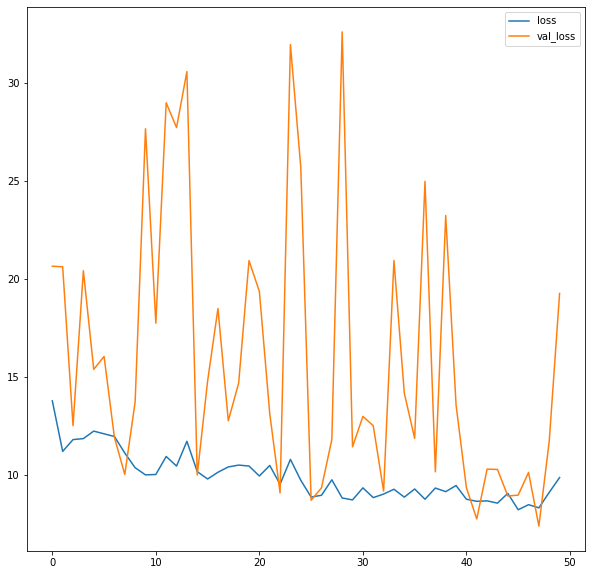

In [11]:
hist = vae.train(song, 50, 200, validation_split=0.2)

plt.figure(figsize = (10,10))
for k in hist.history.keys():
    plt.plot(hist.history[k], label = k)
plt.legend()

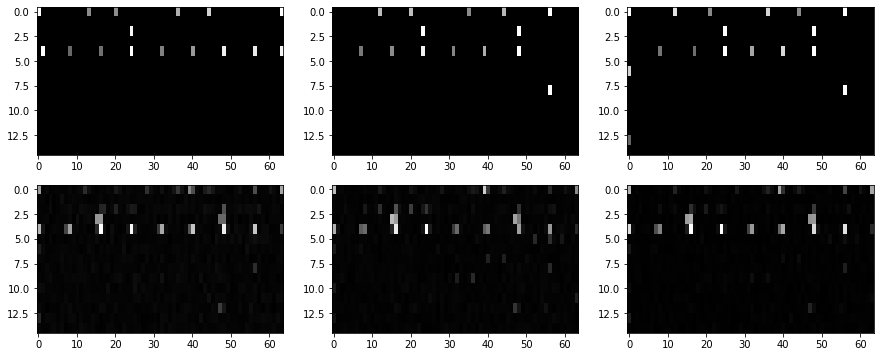

In [14]:
song_pred = vae.VAE.predict(song2)
song_pred.shape

fig, axes = plt.subplots(2,3, figsize = (15,6))
plt.gray()

for i in range(3):
    axes[0,i].imshow(song[i].T, aspect = 'auto')
    axes[1,i].imshow(song_pred[i].T, aspect = 'auto')
    #axes[1,i].plot(song[:,0])

In [15]:
nd = songdict['notedict'].item()
writeBarArray(song_pred, 'data/dummy/test', nd)